In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib as jb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df["Message"].value_counts()

Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.              

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.shape

(5572, 2)

In [7]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
import missingno as msno

Text(0, 0.5, 'Count')

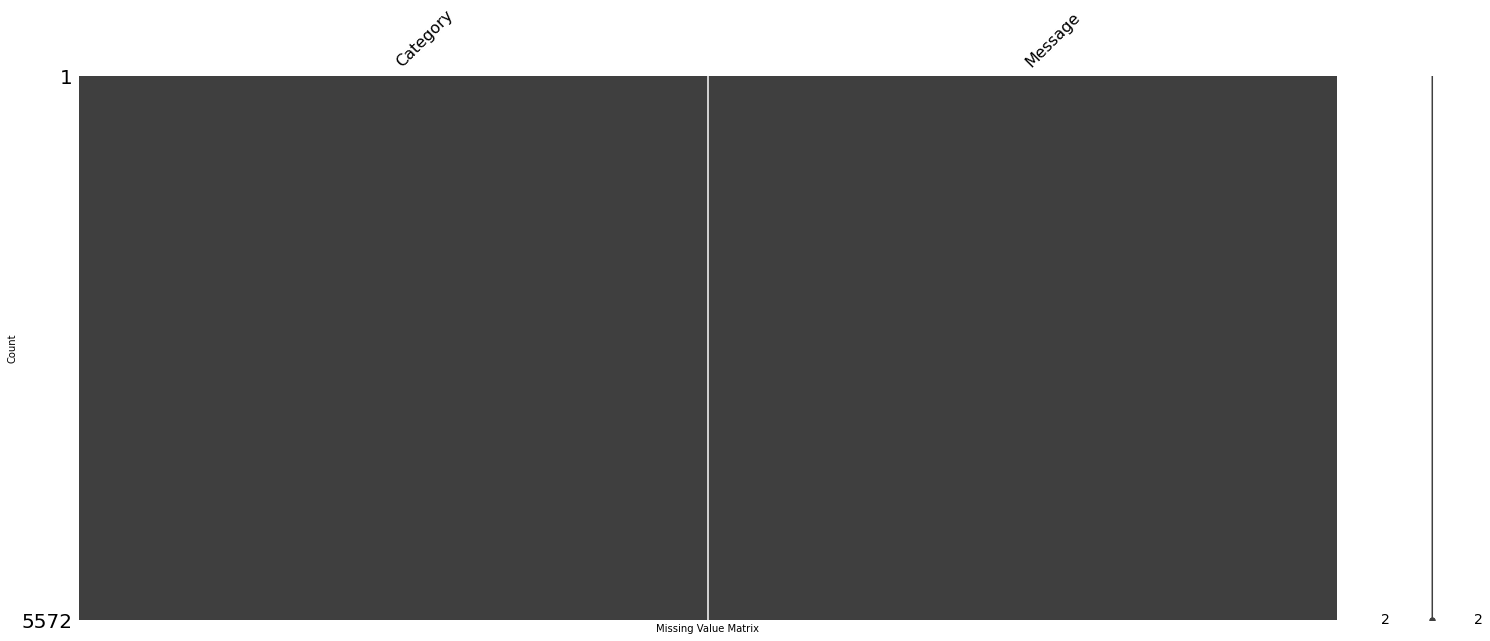

In [10]:
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel('Count')

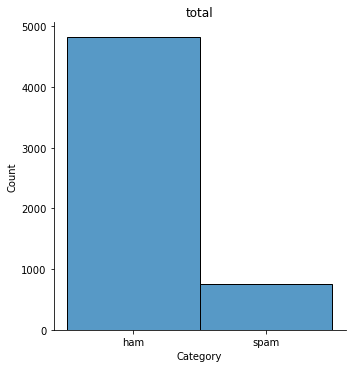

In [11]:
sns.displot(data=df,x="Category")
plt.title("total")
plt.show()

In [12]:
df['Category']=df['Category'].map({'ham':0,'spam':1})

In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv=CountVectorizer()

In [16]:
x=df["Message"]
y=df["Category"]

In [17]:
x.shape

(5572,)

In [18]:
y.shape

(5572,)

In [19]:
x=cv.fit_transform(x)

In [20]:
x

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [22]:
x_train.shape

(4457, 8709)

In [23]:
y_train.shape

(4457,)

In [24]:
print(x_train)

  (0, 2720)	1
  (0, 2602)	1
  (0, 4468)	1
  (0, 5195)	1
  (0, 3877)	1
  (0, 6341)	1
  (1, 7070)	1
  (1, 8664)	2
  (1, 3319)	1
  (1, 4229)	1
  (1, 8488)	1
  (1, 8670)	2
  (1, 7666)	1
  (1, 2684)	1
  (1, 4765)	1
  (1, 1081)	1
  (1, 4468)	1
  (1, 8439)	1
  (1, 1807)	1
  (1, 8431)	1
  (1, 2161)	1
  (1, 5561)	1
  (1, 1518)	1
  (1, 7722)	1
  (1, 3738)	1
  :	:
  (4455, 2879)	1
  (4455, 8101)	1
  (4455, 5195)	1
  (4455, 7122)	1
  (4455, 7970)	1
  (4455, 4595)	1
  (4455, 5518)	1
  (4455, 2627)	1
  (4455, 6614)	1
  (4456, 3369)	2
  (4456, 7802)	2
  (4456, 8367)	2
  (4456, 6767)	1
  (4456, 5797)	1
  (4456, 6521)	2
  (4456, 7048)	1
  (4456, 3519)	1
  (4456, 7311)	1
  (4456, 7854)	1
  (4456, 8371)	1
  (4456, 385)	1
  (4456, 7377)	1
  (4456, 7382)	1
  (4456, 747)	1
  (4456, 166)	1


In [25]:
print(y_train)

3075    0
1787    0
1614    0
4304    0
3266    1
       ..
789     1
968     0
1667    0
3321    0
1688    1
Name: Category, Length: 4457, dtype: int64


In [26]:
from sklearn.naive_bayes import MultinomialNB
model =  MultinomialNB()

In [27]:
model.fit(x_train, y_train)

MultinomialNB()

In [28]:
model.score(x_test,y_test)

0.9847533632286996

In [29]:
result=model.score(x_test,y_test)

In [30]:
result=result*100

In [31]:
result

98.47533632286995

In [32]:
import pickle

In [33]:
pickle.dump(model,open("spam.pkl","wb"))

In [34]:
pickle.dump(cv,open("vectorizer.pkl","wb"))

In [35]:
clf=pickle.load(open("spam.pkl","rb"))

In [36]:
clf

MultinomialNB()

In [39]:
msg="Free entry in 2 a wkly comp to win FA Cup final"
df=[msg]
vect=cv.transform(df).toarray()
result=model.predict(vect)
print(result)

[1]
